# LAB ASSIGNMENT 6 - Logistic Regression
### NAME: TAVLEEN KAUR
### STUDENT ID: 8977981

# STEP 1: Obtain the data and redefine 2 classes for the target variable: virginica and non-virginica

In [877]:
# OBTANING THE DATA
from sklearn import datasets
iris_dataset = datasets.load_iris(as_frame=True)
df_iris_dataset = iris_dataset.data
df_iris_dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [878]:
# Redefine 2 classes for the target variable: virginica and non-virginica
df_iris_dataset['target'] = iris_dataset.target
df_iris_dataset['Species Name'] = iris_dataset.target_names[iris_dataset.target]
df_iris_dataset['target'] = df_iris_dataset['Species Name'].map({'virginica': 1, 'versicolor': 0, 'setosa': 0})
df_iris_dataset['Class Name'] = df_iris_dataset['target'].map({1:'Virginica', 0 : 'Non Virginica'})
df_iris_dataset.drop(columns=['Species Name'], axis=1, inplace=True)
df_iris_dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Class Name
0,5.1,3.5,1.4,0.2,0,Non Virginica
1,4.9,3.0,1.4,0.2,0,Non Virginica
2,4.7,3.2,1.3,0.2,0,Non Virginica
3,4.6,3.1,1.5,0.2,0,Non Virginica
4,5.0,3.6,1.4,0.2,0,Non Virginica


# STEP 2: Explore The Data

### 1. Table with descriptive statistics for each of the two classes.

In [879]:
virginica_class = df_iris_dataset[df_iris_dataset['target'] == 1]
non_virginica_class = df_iris_dataset[df_iris_dataset['target'] == 0]

In [880]:
# Virginica class
virginica_class.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,50.00000,50.000000,50.000000,50.00000,50.0
mean,6.58800,2.974000,5.552000,2.02600,1.0
std,0.63588,0.322497,0.551895,0.27465,0.0
min,4.90000,2.200000,4.500000,1.40000,1.0
25%,6.22500,2.800000,5.100000,1.80000,1.0
50%,6.50000,3.000000,5.550000,2.00000,1.0
75%,6.90000,3.175000,5.875000,2.30000,1.0
max,7.90000,3.800000,6.900000,2.50000,1.0


In [881]:
# Non-virginica class
non_virginica_class.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,100.000000,100.000000,100.000000,100.000000,100.0
mean,5.471000,3.099000,2.861000,0.786000,0.0
std,0.641698,0.478739,1.449549,0.565153,0.0
min,4.300000,2.000000,1.000000,0.100000,0.0
25%,5.000000,2.800000,1.500000,0.200000,0.0
50%,5.400000,3.050000,2.450000,0.800000,0.0
75%,5.900000,3.400000,4.325000,1.300000,0.0
max,7.000000,4.400000,5.100000,1.800000,0.0


### 2. Histogram per feature, for each of the two classes.

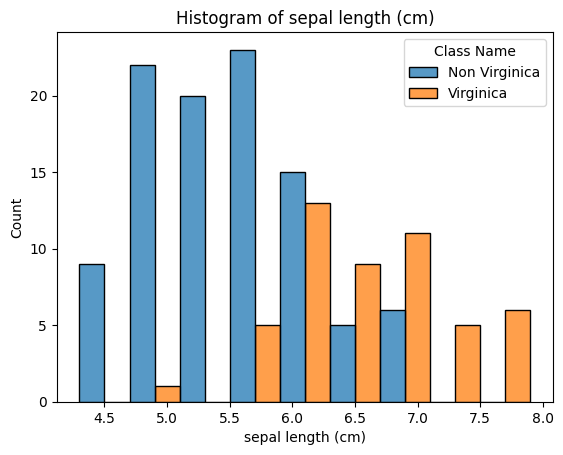

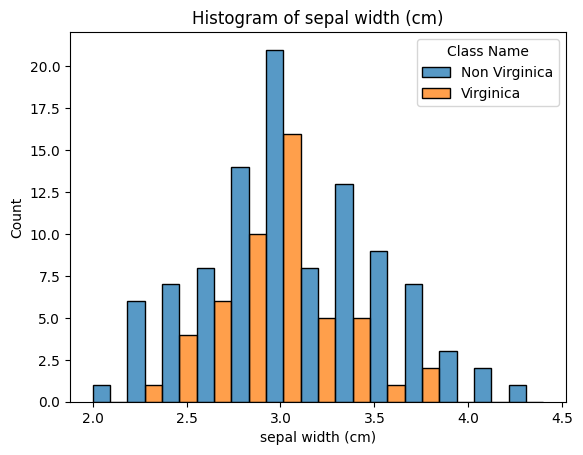

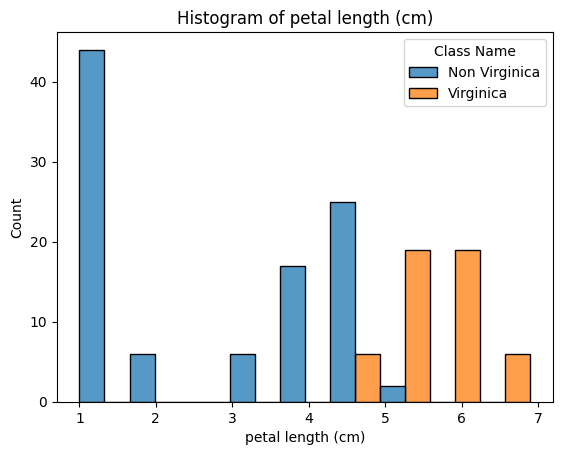

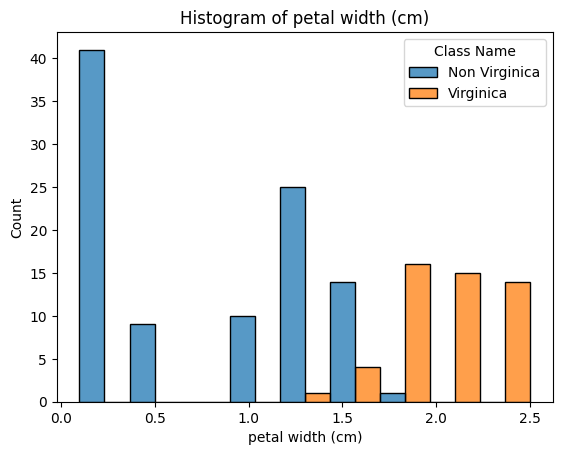

In [882]:
import seaborn as sns
import matplotlib.pyplot as plt

for feature in iris_dataset.feature_names:
    sns.histplot(data=df_iris_dataset, x= feature, hue = "Class Name",multiple="dodge")
    plt.title(f'Histogram of {feature}')
    plt.show()

### 3. Correlation matrix between the four features

In [883]:
correlation_matrix = df_iris_dataset[iris_dataset.feature_names].corr()

print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                   sepal length (cm)  sepal width (cm)  petal length (cm)   
sepal length (cm)           1.000000         -0.117570           0.871754  \
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  


### 4. At least 3 additional graphs.

##### a) PAIRPLOT 
LINK: [Python Data Visualization](https://www.kaggle.com/code/benhamner/python-data-visualizations)
EXPLANATION: With each scatterplot coloured by class, this pairplot shows pairwise connections between characteristics. It facilitates the visual representation of the distribution of the classes with regard to each feature pair. The degree of class separation in the feature space is evident from this map. Reliability of the characteristics for sample classification is shown by well-separated classes. 

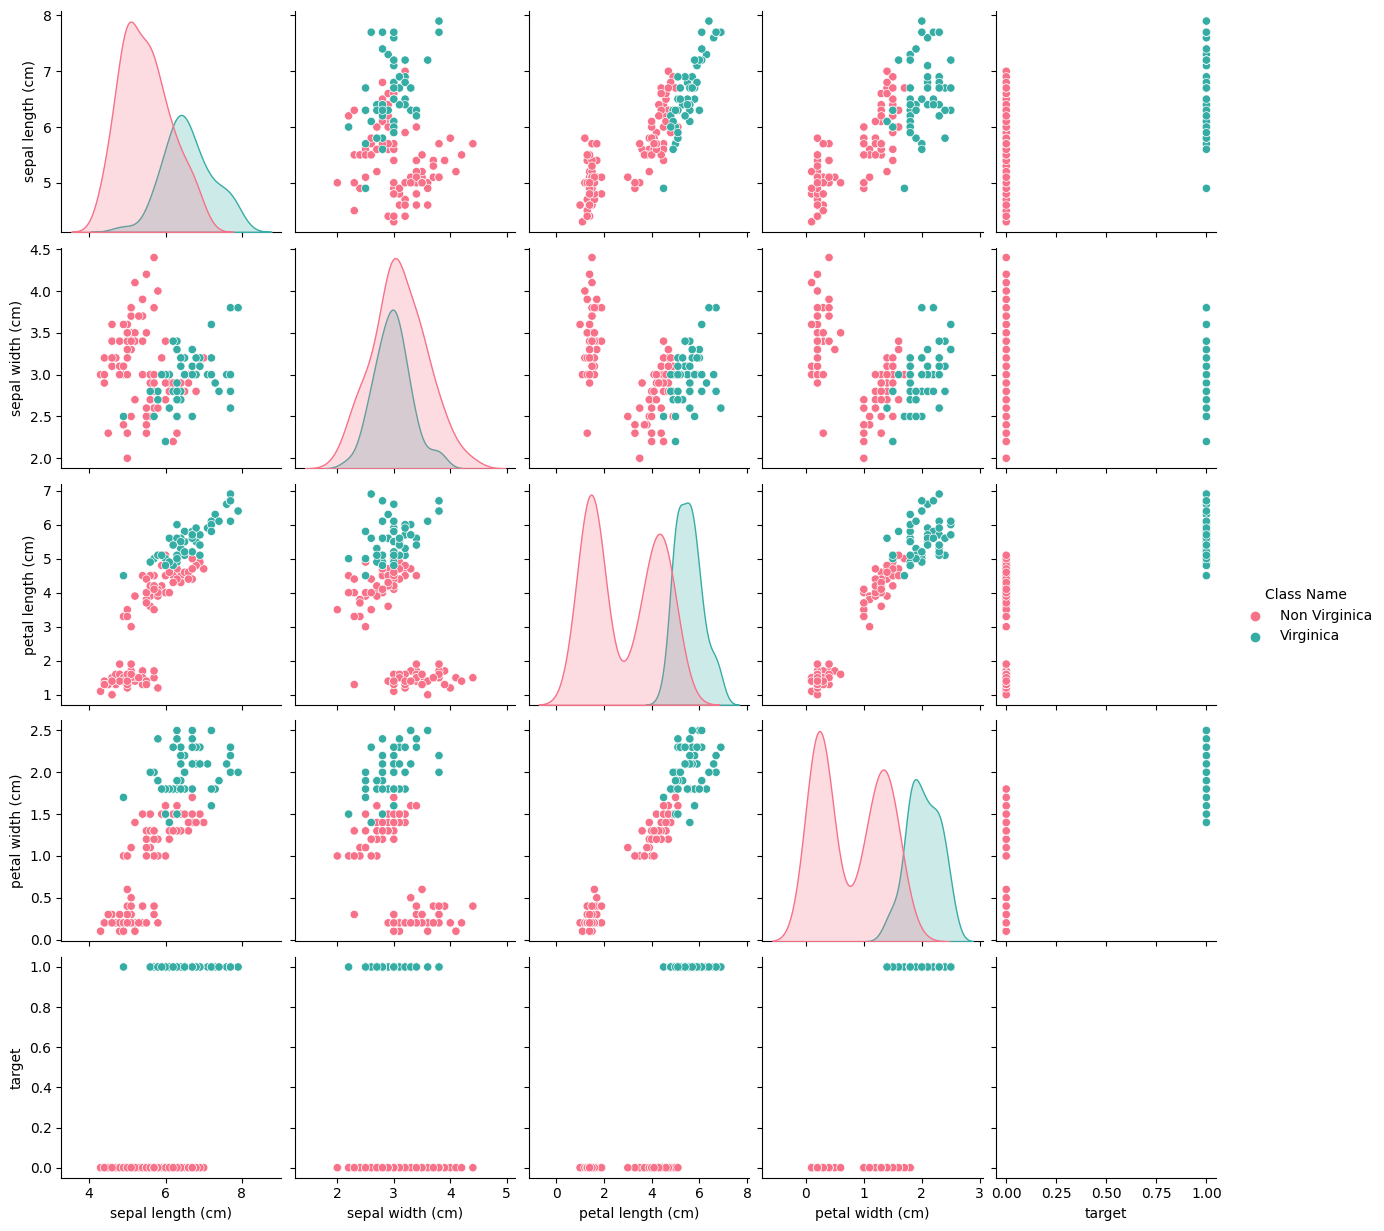

In [884]:
sns.pairplot(df_iris_dataset, hue="Class Name", palette="husl")
plt.show()

##### b) BOXPLOT
LINK: [Python Data Visualization](https://www.kaggle.com/code/benhamner/python-data-visualizations)
EXPLANATION: Each feature's distribution for each class is shown separately in this boxplot. Within each class, it aids in our comprehension of the distribution and range of feature values. Finding outliers and determining if a feature's distributions change considerably between classes can help with feature selection and help us understand the discriminative potential of features.

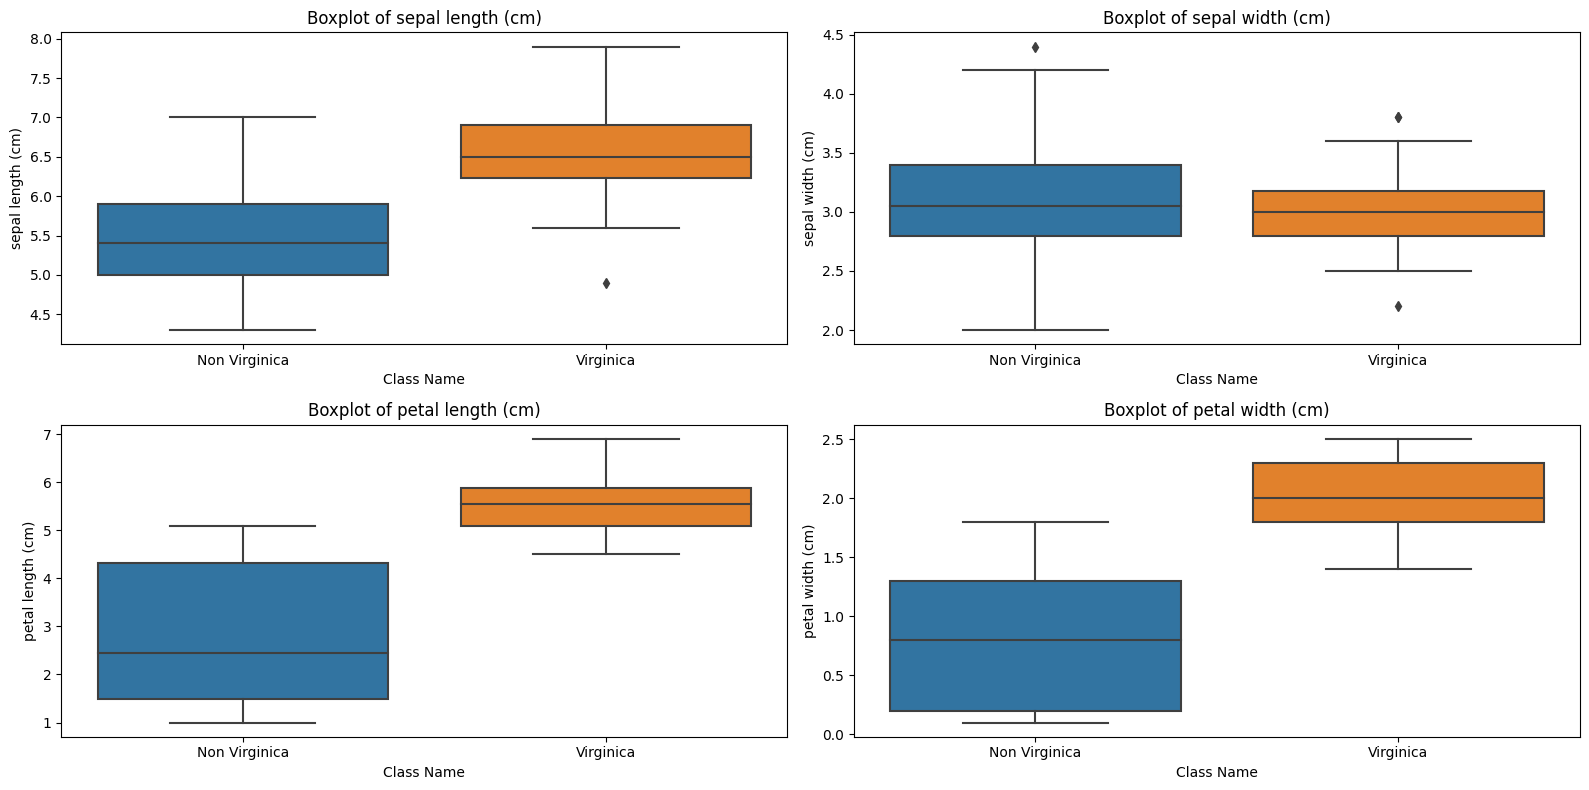

In [885]:
plt.figure(figsize=(16, 8))
for i, feature in enumerate(iris_dataset.feature_names):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x="Class Name", y=feature, data=df_iris_dataset)
    plt.title(f"Boxplot of {feature}")
plt.tight_layout()
plt.show()

##### C) VIOLIN PLOT
LINK: [Python Data Visualization](https://www.kaggle.com/code/benhamner/python-data-visualizations)
EXPLANATION: Comparable to box plots, violin plots offer a more thorough picture of the feature value distribution, including the calculation of the kernel density. We can more efficiently compare the feature value distribution between classes with this figure. It is especially helpful for displaying the distribution of feature values and highlighting variations among classes.

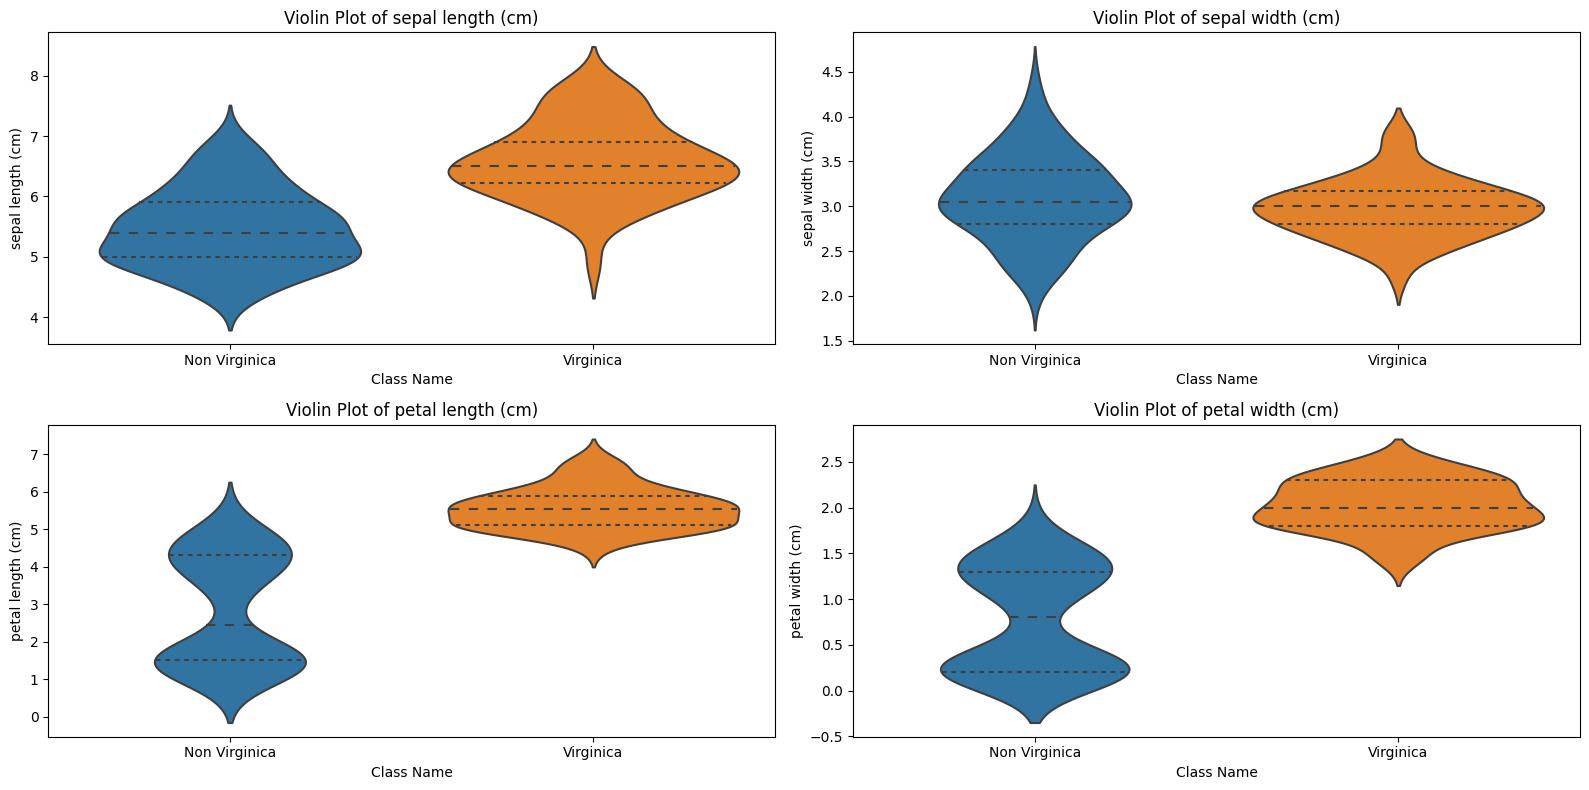

In [886]:
plt.figure(figsize=(16, 8))
for i, feature in enumerate(iris_dataset.feature_names):
    plt.subplot(2, 2, i + 1)
    sns.violinplot(x="Class Name", y=feature, data=df_iris_dataset, inner='quartile')
    plt.title(f"Violin Plot of {feature}")
plt.tight_layout()
plt.show()

### 5. Three Insights
(i) Important Features: We can see that there is a lot of overlap in the "sepal length" and "sepal width" across the classes, particularly between "Virginica" and "Non Virginica," by looking at the boxplots and violin plots of each characteristic by class. In contrast, "Virginica" typically has bigger values than "Non Virginica," indicating a clear distinction between the two groups in terms of "petal width" and "petal length." In order to differentiate between the two groups, it appears that "petal length" and "petal width" are more significant characteristics.

(ii) Outlier Detection: The "sepal width" characteristic for the "Non Virginica" class is one area where we may particularly spot any outliers in the dataset using the boxplots and violin plots. Outliers might be biological changes or measurement mistakes; therefore, it's critical to treat them effectively in the modelling process by applying robust modelling approaches, deleting them, or modifying the data.

(iii) Multiple Relationships: Taking into account class information, the pairplot with class colouring enables us to see the pairwise relationships between features. We find that for all classes, there is a significant positive association between "petal width" and "petal length". There is also a positive link between "petal length" and "sepal length." When developing feature engineering and selection procedures for classification model construction, these multivariate correlations might serve as guidance.

# STEP 3: Split the data to a train set (120 records), a validation set (15 records)  and a test set (15 records).

In [887]:
from sklearn.model_selection import train_test_split

# Data into train set and temporary set
train_data, temp_data = train_test_split(df_iris_dataset, train_size=120, random_state=42)

# Temporary set into validation set and test set 
validation_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

# Print the shapes of all sets
print("Train set shape:", train_data.shape)
print("Validation set shape:", validation_data.shape)
print("Test set shape:", test_data.shape)

Train set shape: (120, 6)
Validation set shape: (15, 6)
Test set shape: (15, 6)


# STEP 4: Run four logistic regression models.

In [888]:
from sklearn.linear_model import LogisticRegression
from itertools import combinations

logreg_model = LogisticRegression(max_iter=1000)
features = iris_dataset.feature_names
results = []

for num_features in range(1, 5):
    feature_combinations = combinations(features, num_features)
    for feature_set in feature_combinations:
        
        X_train = train_data[list(feature_set)]
        y_train = train_data['target']
        logreg_model.fit(X_train, y_train)
        
        train_accuracy = logreg_model.score(X_train, y_train)
        results.append((feature_set, train_accuracy))

for result in results:
    print("Features:", result[0], "- Train Accuracy:", result[1])


Features: ('sepal length (cm)',) - Train Accuracy: 0.7666666666666667
Features: ('sepal width (cm)',) - Train Accuracy: 0.675
Features: ('petal length (cm)',) - Train Accuracy: 0.9416666666666667
Features: ('petal width (cm)',) - Train Accuracy: 0.95
Features: ('sepal length (cm)', 'sepal width (cm)') - Train Accuracy: 0.775
Features: ('sepal length (cm)', 'petal length (cm)') - Train Accuracy: 0.95
Features: ('sepal length (cm)', 'petal width (cm)') - Train Accuracy: 0.95
Features: ('sepal width (cm)', 'petal length (cm)') - Train Accuracy: 0.95
Features: ('sepal width (cm)', 'petal width (cm)') - Train Accuracy: 0.95
Features: ('petal length (cm)', 'petal width (cm)') - Train Accuracy: 0.9583333333333334
Features: ('sepal length (cm)', 'sepal width (cm)', 'petal length (cm)') - Train Accuracy: 0.95
Features: ('sepal length (cm)', 'sepal width (cm)', 'petal width (cm)') - Train Accuracy: 0.95
Features: ('sepal length (cm)', 'petal length (cm)', 'petal width (cm)') - Train Accuracy: 0.

# STEP 5: Evaluate the models on the validation set:

### 1. Creating tables per model.

In [889]:
import pandas as pd

def create_evaluation_table(model, features, data):
    X_val = data[features]
    y_val = data['target']
    predictions = model.predict(X_val)
    probabilities = model.predict_proba(X_val)[:, 1]

    evaluation_table = pd.DataFrame({
        'Instance Number': range(1, len(data) + 1),
        'Probability of Predicting Virginica': probabilities,
        'Actual Prediction by the Model': predictions,
        'Ground Truth': y_val
    })
    
    return evaluation_table

def summarize_evaluation_table(evaluation_table):
    correct_predictions = (evaluation_table['Actual Prediction by the Model'] == evaluation_table['Ground Truth']).sum()
    total_instances = len(evaluation_table)
    accuracy = correct_predictions / total_instances
    return accuracy

evaluation_tables = []
for idx, result in enumerate(results):
    features = list(result[0])
    model = LogisticRegression(max_iter=1000)
    model.fit(train_data[features], train_data['target'])
    evaluation_table = create_evaluation_table(model, features, validation_data)
    evaluation_tables.append(evaluation_table)

for idx, evaluation_table in enumerate(evaluation_tables):
    accuracy = summarize_evaluation_table(evaluation_table)
    print(f"Model {idx + 1} Accuracy:", accuracy)
    print("Evaluation Table for Model", idx + 1)
    print(evaluation_table)
    print()


Model 1 Accuracy: 0.9333333333333333
Evaluation Table for Model 1
     Instance Number  Probability of Predicting Virginica   
26                 1                             0.064510  \
18                 2                             0.217912   
118                3                             0.937717   
145                4                             0.671933   
78                 5                             0.336388   
127                6                             0.382264   
108                7                             0.671933   
55                 8                             0.217912   
30                 9                             0.044226   
29                10                             0.036520   
141               11                             0.753228   
110               12                             0.578831   
19                13                             0.077646   
132               14                             0.529589   
64                1

### Summarize the Data in each Table.

In [890]:
import numpy as np

def compute_accuracy(predictions, ground_truth):
    return np.mean(predictions == ground_truth)

accuracies = []
for idx, evaluation_table in enumerate(evaluation_tables):
    predictions = evaluation_table['Actual Prediction by the Model']
    ground_truth = evaluation_table['Ground Truth']
    accuracy = compute_accuracy(predictions, ground_truth)
    accuracies.append(accuracy)

for idx, accuracy in enumerate(accuracies):
    print(f"Model {idx + 1} Accuracy:", accuracy)


Model 1 Accuracy: 0.9333333333333333
Model 2 Accuracy: 0.5333333333333333
Model 3 Accuracy: 1.0
Model 4 Accuracy: 1.0
Model 5 Accuracy: 0.9333333333333333
Model 6 Accuracy: 1.0
Model 7 Accuracy: 1.0
Model 8 Accuracy: 1.0
Model 9 Accuracy: 1.0
Model 10 Accuracy: 1.0
Model 11 Accuracy: 1.0
Model 12 Accuracy: 1.0
Model 13 Accuracy: 1.0
Model 14 Accuracy: 1.0
Model 15 Accuracy: 1.0


### 2. Plot the decision boundary for three models.

In [891]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def plot_decision_boundary(model, features, data):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(data[features])

    n_components = min(2, X_scaled.shape[1])

    if n_components > 1:
        
        pca = PCA(n_components=n_components)
        X_pca = pca.fit_transform(X_scaled)

        plt.figure()
        plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['target'], cmap='viridis', edgecolor='k', s=20)
        plt.title(f'Decision Boundary for Model with {len(features)} Features')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')

        h = 0.02  
        x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
        y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')

        plt.show()
    else:
        print("With less than two components, decision boundary cannot be plotted.")

for idx, result in enumerate(results[:3]):
    features = list(result[0])
    model = LogisticRegression(max_iter=1000)
    model.fit(train_data[features], train_data['target'])
    plot_decision_boundary(model, features, validation_data)

With less than two components, decision boundary cannot be plotted.
With less than two components, decision boundary cannot be plotted.
With less than two components, decision boundary cannot be plotted.


### 3. Failure modes.
(i) MODEL 1: 
Failure modes: When the chosen characteristic is insufficient to differentiate across classes, this model is probably incorrect. For instance, when relying just on "sepal width" or "sepal length," which significantly overlap within classes.
Failure patterns: These might include cases when the chosen feature has identical values for several classes, resulting in incorrect classifications.

(ii) MODEL 2: 
Failure modes: If the characteristics used are not the best for separating classes, this model may not work as intended. When the chosen characteristics are unable to adequately capture the underlying patterns, it can have trouble.
Failure patterns: The patterns may include situations in which the chosen characteristics, taken separately, offer some degree of differentiation but are unable to fully represent the intricate decision boundaries that exist across classes.

(iii) MODEL 3:
Failure modes: If the decision boundary is extremely nonlinear or if extraneous characteristics are added, which causes overfitting, the model may still be compromised.
Failure patterns: These might include situations in which the model is too complicated and fails to capture noise in the data, resulting in subpar generalisation output.

# STEP 6: Recommend the Best Model

In [892]:
accuracies = []
for idx, evaluation_table in enumerate(evaluation_tables):
    predictions = evaluation_table['Actual Prediction by the Model']
    ground_truth = evaluation_table['Ground Truth']
    accuracy = compute_accuracy(predictions, ground_truth)
    accuracies.append(accuracy)

best_model_idx = np.argmax(accuracies)
best_model_features = list(results[best_model_idx][0])
best_model = LogisticRegression(max_iter=1000)
best_model.fit(train_data[best_model_features], train_data['target'])

test_evaluation_table = create_evaluation_table(best_model, best_model_features, test_data)

test_accuracy = summarize_evaluation_table(test_evaluation_table)

print("Features of Best Model:", best_model_features)
print("Best Model Accuracy on Validation Set:", accuracies[best_model_idx])
print("Best Model Accuracy on Test set:", test_accuracy)

Features of Best Model: ['petal length (cm)']
Best Model Accuracy on Validation Set: 1.0
Best Model Accuracy on Test set: 1.0
